# **Intro to ML**
## Training Loss, Generalisation Error, and Cross Validation

## **PART 1**: Training loss and generalization

Example of how to estimate the:
- training error evaluated on a training dataset
- generalization error estimated on testing data

Make use of the LIBSVM repository of datasets:
http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

In [6]:
# Example of downloading a regression dataset

# windows powershell
# !Invoke-WebRequest -Uri https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/abalone -OutFile abalone.txt

# linux
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/abalone -O abalone.txt

--2025-03-18 10:27:13--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/abalone
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258705 (253K)
Saving to: ‘abalone.txt’

abalone.txt         100%[===================>] 252.64K   405KB/s    in 0.6s    

2025-03-18 10:27:14 (405 KB/s) - ‘abalone.txt’ saved [258705/258705]



In [7]:
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

## **1. Regression Task**

- choosing a regression dataset
- splitting it into a training and test dataset of equal size
- applying linear regression on a random subset of the training set of increasing size
- plotting the mean square error (MSE) of the ERM on the training set as a function of the number of samples $m$

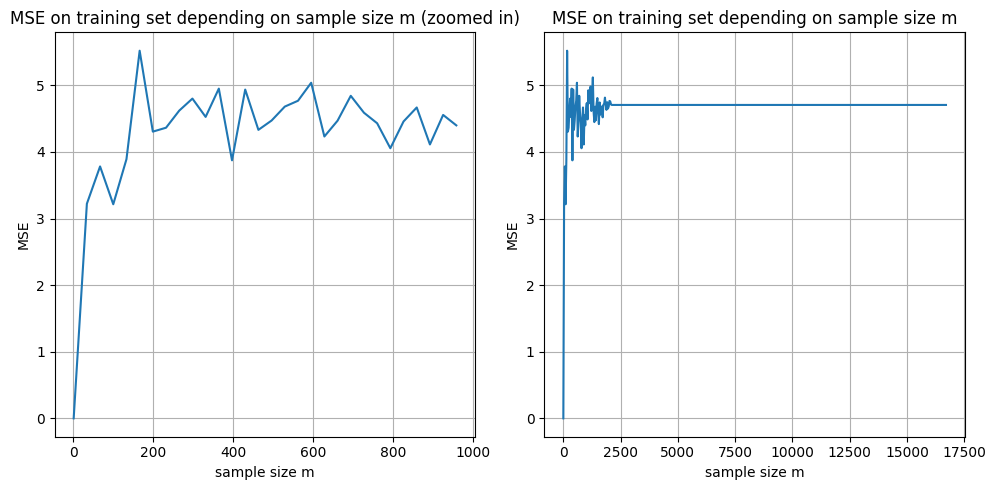

In [8]:
#load regression data set
X, y = load_svmlight_file("abalone.txt")

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#train models on sets of different size and record scores
subset_size_list_train = []
score_list_train = []
for subset_size in range(1, X_train.size, int(X_train.size/500)):
    subset_size_list_train.append(subset_size)

    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

    # Select the first n samples
    X_subset = X_train_shuffled[:subset_size]
    y_subset = y_train_shuffled[:subset_size]

    reg = LinearRegression().fit(X_subset, y_subset)

    y_pred = reg.predict(X_subset)

    # Calculate the MSE and append it
    score_list_train.append(mean_squared_error(y_subset, y_pred))

#visualize data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(subset_size_list_train[:30], score_list_train[:30])
ax1.set_xlabel("sample size m")
ax1.set_ylabel("MSE")
ax1.grid()
ax1.set_title("MSE on training set depending on sample size m (zoomed in)")

ax2.plot(subset_size_list_train, score_list_train)
ax2.set_xlabel("sample size m")
ax2.set_ylabel("MSE")
ax2.grid()
ax2.set_title("MSE on training set depending on sample size m")

plt.tight_layout()
plt.show()

Now plotting the mean square error (MSE) of the ERM on the test set as a function of the number of samples $m$ (i.e. data points in the training set).

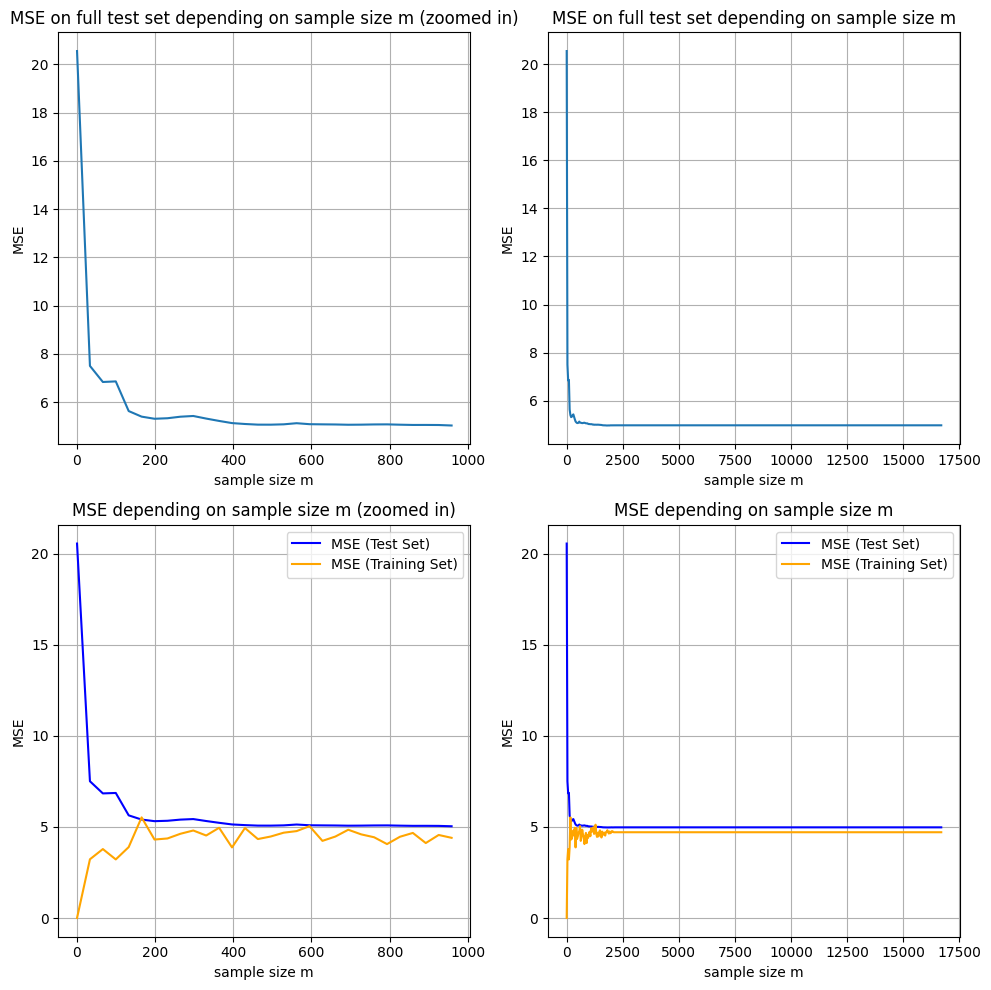

In [9]:
subset_size_list_test = []
score_list_test = []

#train models on sets of different size and record scores
for subset_size in range(1, X_train.size, int(X_train.size/500)):
    subset_size_list_test.append(subset_size)

    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=69)

    # Select the first n samples
    X_subset = X_train_shuffled[:subset_size]
    y_subset = y_train_shuffled[:subset_size]

    reg = LinearRegression().fit(X_subset, y_subset)

    y_pred = reg.predict(X_test)

    # Calculate the MSE and append it
    score_list_test.append(mean_squared_error(y_test, y_pred))

#visualize data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.plot(subset_size_list_test[:30], score_list_test[:30])
ax1.set_xlabel("sample size m")
ax1.set_ylabel("MSE")
ax1.grid()
ax1.set_title("MSE on full test set depending on sample size m (zoomed in)")

ax2.plot(subset_size_list_test, score_list_test)
ax2.set_xlabel("sample size m")
ax2.set_ylabel("MSE")
ax2.grid()
ax2.set_title("MSE on full test set depending on sample size m")

ax3.plot(subset_size_list_test[:30], score_list_test[:30], color='blue', label='MSE (Test Set)')
ax3.plot(subset_size_list_train[:30], score_list_train[:30], color='orange', label='MSE (Training Set)')
ax3.legend(loc="best")
ax3.set_xlabel("sample size m")
ax3.set_ylabel("MSE")
ax3.grid()
ax3.set_title("MSE depending on sample size m (zoomed in)")

ax4.plot(subset_size_list_test, score_list_test, color='blue', label='MSE (Test Set)')
ax4.plot(subset_size_list_train, score_list_train, color='orange', label='MSE (Training Set)')
ax4.legend(loc="best")
ax4.set_xlabel("sample size m")
ax4.set_ylabel("MSE")
ax4.grid()
ax4.set_title("MSE depending on sample size m")

plt.tight_layout()
plt.show()

## Discussion of results

The **MSE curve on the test set** first fluctuates but is in general very high. The curve is also expected to be high, as the model only has insufficent number of samples to generalize to the real distrubition. With larger sample sizes m the curve decreases and stabilizes around a MSE of 5. This is to be expected as we can now generalize better to unseen data/approximate the real distribution of samples in the whole dataset better.

On the other hand the **MSE curve on the training dataset** starts out at 0 for m=1 which is to be expected as we can just learn a model that predicts this sample perfectly (but naturally doesn't generalize well to unseen data). With increasing m it gets harder to find a model that predicts all training samples correctly. This is due to linear regression only beeing able to capture 2 datasamples perfectly at the same time (in almost all cases). In general the MSE for the training data stabilizes around 4.9.

The graphs visualize the **Learning curves** shown in class quiete well, as they illustrate $L_D(h_D)$(Training loss) and $L_{P,f}(h_D)$(True loss). It also worth mentioning that they grow towards each other with higher m but stabilize on two different values (Test loss > Training loss for allmost all m). Another interesting point is that there are small m for which the training loss is higer than the test loss. This is quiete unintutive but can be explained by the high variance of models that are trained on few samples.

## **2. Classification Task**

- choose a classification dataset
- apply logistic regression
- repeat the previous steps using the mean accuracy instead of the squared loss
- plot the mean accuracy of the ERM on the training set as a function of the number of samples $m$

In [13]:
# Example of downloading a classification dataset

# linux
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a -O a1a.txt

--2025-03-18 10:35:04--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114818 (112K)
Saving to: ‘a1a.txt’

a1a.txt             100%[===================>] 112.13K   235KB/s    in 0.5s    

2025-03-18 10:35:05 (235 KB/s) - ‘a1a.txt’ saved [114818/114818]



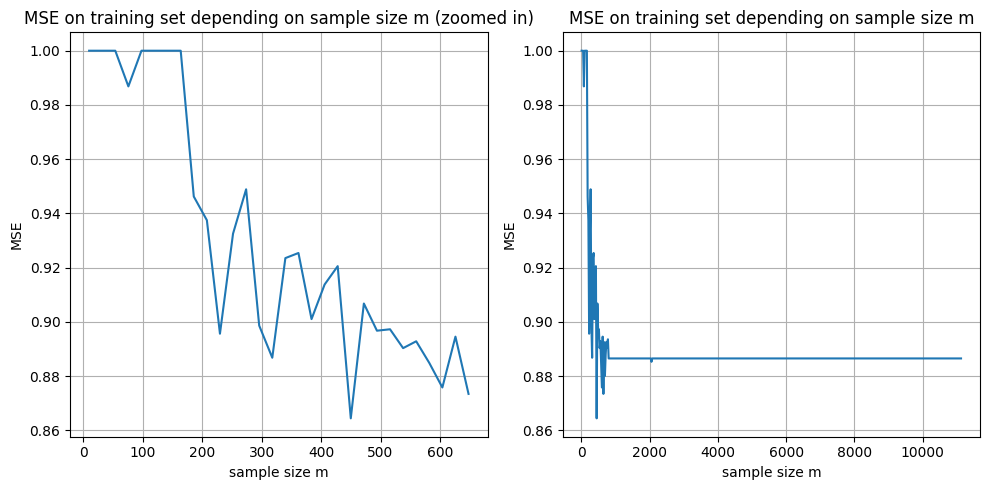

In [14]:
#load classification data set
X, y = load_svmlight_file("a1a.txt")

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#train models on sets of different size and record scores
subset_size_list_train = []
score_list_train = []
for subset_size in range(10, X_train.size, int(X_train.size/500)):
    subset_size_list_train.append(subset_size)

    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

    # Select the first n samples
    X_subset = X_train_shuffled[:subset_size]
    y_subset = y_train_shuffled[:subset_size]

    reg = LogisticRegression(penalty=None).fit(X_subset, y_subset)

    y_pred = reg.predict(X_subset)

    # Calculate the MSE and append it
    score_list_train.append(accuracy_score(y_subset, y_pred))


#visualize data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(subset_size_list_train[:30], score_list_train[:30])
ax1.set_xlabel("sample size m")
ax1.set_ylabel("MSE")
ax1.grid()
ax1.set_title("MSE on training set depending on sample size m (zoomed in)")

ax2.plot(subset_size_list_train, score_list_train)
ax2.set_xlabel("sample size m")
ax2.set_ylabel("MSE")
ax2.grid()
ax2.set_title("MSE on training set depending on sample size m")

plt.tight_layout()
plt.show()

Plotting the mean accuracy of the ERM on the test set as a function of the number of samples $m$ (i.e. data points in the training set).


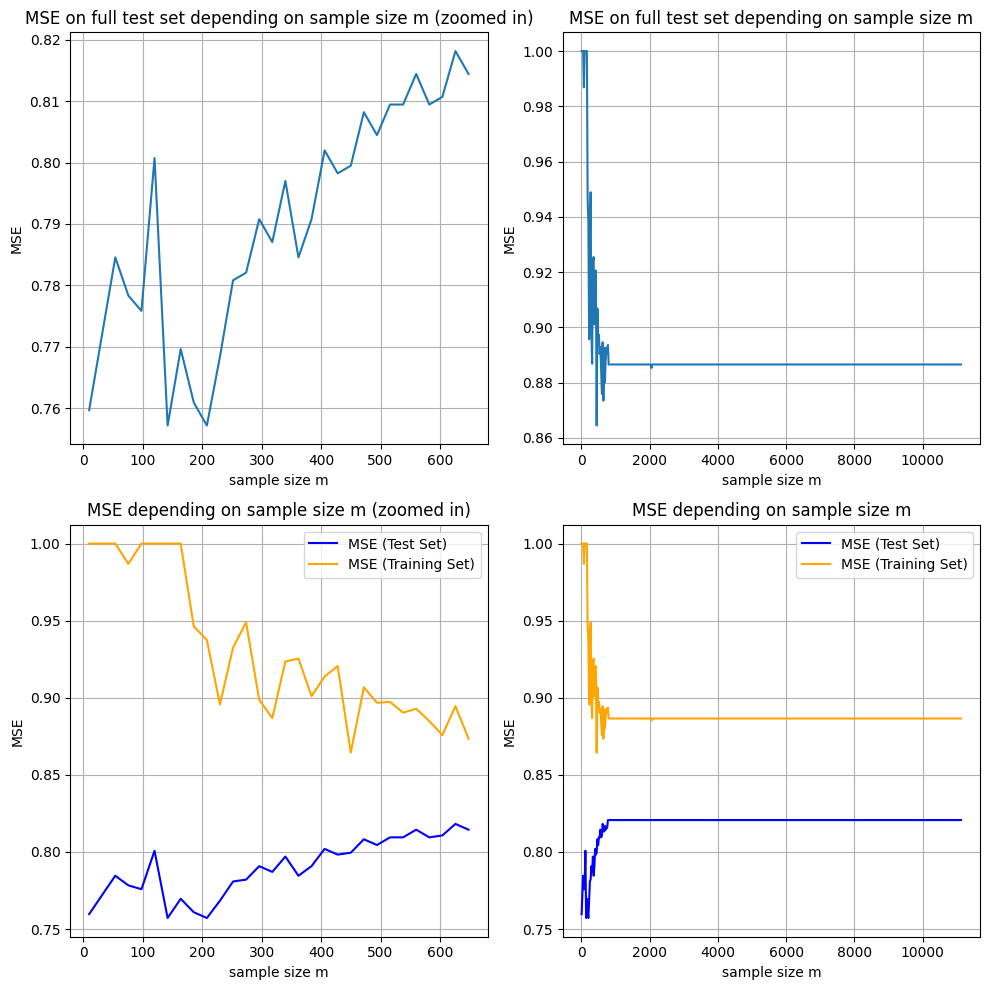

In [15]:
# train models on sets of different size and record scores
subset_size_list_test = []
score_list_test = []
for subset_size in range(10, X_train.size, int(X_train.size/500)):
    subset_size_list_test.append(subset_size)

    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=69)

    # Select the first n samples
    X_subset = X_train_shuffled[:subset_size]
    y_subset = y_train_shuffled[:subset_size]

    reg = LogisticRegression(penalty=None).fit(X_subset, y_subset)

    y_pred = reg.predict(X_test)

    # Calculate the MSE and append it
    score_list_test.append(accuracy_score(y_test, y_pred))

# visualize data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.plot(subset_size_list_test[:30], score_list_test[:30])
ax1.set_xlabel("sample size m")
ax1.set_ylabel("MSE")
ax1.grid()
ax1.set_title("MSE on full test set depending on sample size m (zoomed in)")

ax2.plot(subset_size_list_test, score_list_train)
ax2.set_xlabel("sample size m")
ax2.set_ylabel("MSE")
ax2.grid()
ax2.set_title("MSE on full test set depending on sample size m")

ax3.plot(subset_size_list_test[:30], score_list_test[:30], color='blue', label='MSE (Test Set)')
ax3.plot(subset_size_list_train[:30], score_list_train[:30], color='orange', label='MSE (Training Set)')
ax3.legend(loc="best")
ax3.set_xlabel("sample size m")
ax3.set_ylabel("MSE")
ax3.grid()
ax3.set_title("MSE depending on sample size m (zoomed in)")

ax4.plot(subset_size_list_test, score_list_test, color='blue', label='MSE (Test Set)')
ax4.plot(subset_size_list_train, score_list_train, color='orange', label='MSE (Training Set)')
ax4.legend(loc="best")
ax4.set_xlabel("sample size m")
ax4.set_ylabel("MSE")
ax4.grid()
ax4.set_title("MSE depending on sample size m")

plt.tight_layout()
plt.show()

## Discussion of results

The curves show **similar behaviour** as in the first subtask. The primary difference now is that we use Logistic regression and mean accuracy as a loss function. However, the general behaviour of the learning curves is independent of the model we choose. The only difference becomes **$D_{VC}$ and thus $\Omega(m,D_{VC})$**. If we would compare two different models (ie. logistic regression and Desision tree) on the same dataset this could be seen in that the distance between the two curves for a given m would be different.

## **PART 2**: Cross-validation

## **3. Cross validation for hyperparameter selection**

- Use SVM classifier -
[*Support Vector Machines in [scikit-learn](https://scikit-learn.org/stable/modules/svm.html)*]
- Apply cross-validation to evaluate different combinations of values of the model hyperparameters:
    - box constraint $C > 0$
    - kernel parameter $\gamma > 0$

$-$

In [17]:
#load classification data
X, y = load_svmlight_file("a1a.txt")

#run grid search for C and gamma using scales that seem realistic based on what parameters are usually used here
max_accuracy = 0
best_params = None

for c in [10**i for i in range(0,4)]:
    for gamma in [1/10**i for i in range(0,4)]:
        svc = SVC(C=c, gamma=gamma)

        #calculate the 10 fold cross validation score
        cv_scores = cross_val_score(svc, X, y, cv=10)
        print(f'For c={c:.2f} and gamma={gamma:.2f} the mean cross validation score is {np.mean(cv_scores):.3f}')

        #look for the best parameter combination
        if np.mean(cv_scores)>max_accuracy:
            max_accuracy = np.mean(cv_scores)
            best_params = (c, gamma)

print(f"The best parameters are c={best_params[0]:.2f} and gamma={best_params[1]:.2f} with a mean cross validation score of {max_accuracy:.3f}")

For c=1.00 and gamma=1.00 the mean cross validation score is 0.755
For c=1.00 and gamma=0.10 the mean cross validation score is 0.829
For c=1.00 and gamma=0.01 the mean cross validation score is 0.829
For c=1.00 and gamma=0.00 the mean cross validation score is 0.754
For c=10.00 and gamma=1.00 the mean cross validation score is 0.759
For c=10.00 and gamma=0.10 the mean cross validation score is 0.812
For c=10.00 and gamma=0.01 the mean cross validation score is 0.839
For c=10.00 and gamma=0.00 the mean cross validation score is 0.829
For c=100.00 and gamma=1.00 the mean cross validation score is 0.759
For c=100.00 and gamma=0.10 the mean cross validation score is 0.792
For c=100.00 and gamma=0.01 the mean cross validation score is 0.826
For c=100.00 and gamma=0.00 the mean cross validation score is 0.835
For c=1000.00 and gamma=1.00 the mean cross validation score is 0.759
For c=1000.00 and gamma=0.10 the mean cross validation score is 0.790
For c=1000.00 and gamma=0.01 the mean cross 

- Check how sensitive the cross-validation error is to changes in $C$ and $\gamma$
- Choose the combination of $C$ and $\gamma$ that minimizes the cross-validation error
- Train the SVM on the entire dataset and report the total classification error

In [18]:
#The best parameters on the given dataset are c=10 and gamma=0.01
svc = SVC(C=10, gamma=0.01)
svc.fit(X,y)
y_pred = SVC.predict(svc,X)
#classification error = 1 - accuracy score
print(f"The total classification error is {1-accuracy_score(y_pred,y)}")

The total classification error is 0.14080996884735197


Cross validation has been used to reduce sensitivity in hyperparameter changes. It evaluates them more accuratly because we now have multiple train/testsets on which we can evaluate. This reduces the variance, which is quite high when only having a single train/testset. This can also be seen in the example where using 10 fold cross validation achieved a cross validation score of 0.839 and using the whole dataset 1-0.14=0.86 (the score on the whole data set has a higher variance).